<ul style = "font-size:18px; font-weight:solid;line-height: 1.5;">
<li>Sparsh Sharma | 100329093</li>
<li>Simardeep Kaur |100329207</li>
<li>Jinish Kanpara | 100330202</li>
<li>Amit Verma | 100329477</li>
</ul>

# Restaurant Startup Application

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
restaurants=pd.read_csv('C:\\Users\\Owner\\Downloads\\College\\Capstone Project\\zomato-bangalore-restaurants\\zomato.csv')

### About Data

In [3]:
restaurants.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [4]:
# Check number of rows and column
restaurants.shape

(51717, 17)

In [5]:
# Check the number of null entries
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Data Cleaning

Text(114.0, 0.5, 'Count of Restaurants')

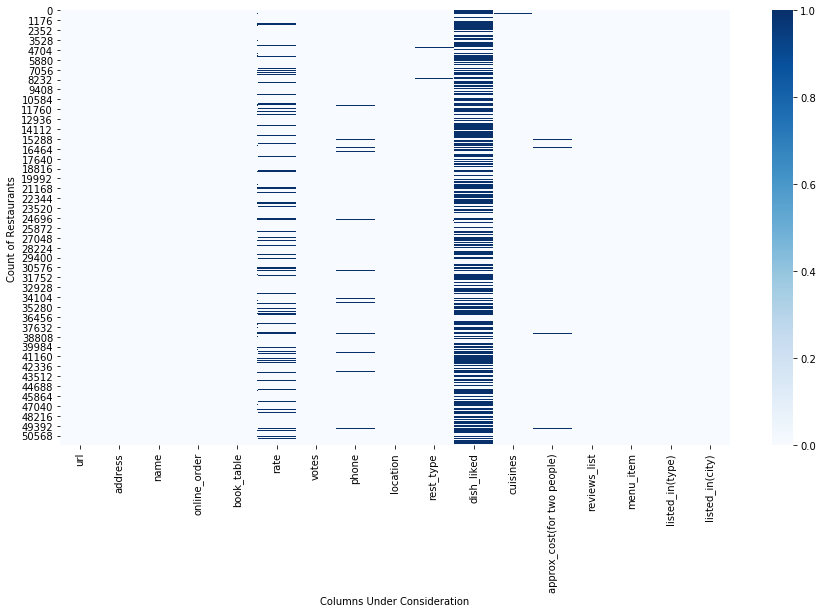

In [6]:
# Create a heat map of null data
fig= plt.subplots(figsize=(15,8))
sns.heatmap(restaurants.isnull(),cmap="Blues")
plt.xlabel('Columns Under Consideration')
plt.ylabel('Count of Restaurants')

Drop Columns

In [7]:
df=restaurants.drop(['url','address','dish_liked','phone'],axis=1)

Drop Duplicate Rows

In [8]:
df.duplicated().sum()         # Total 63 duplicate rows
df.drop_duplicates(inplace=True)

Remove the NaN values from the dataset

In [9]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43486 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43486 non-null  object
 1   online_order                 43486 non-null  object
 2   book_table                   43486 non-null  object
 3   rate                         43486 non-null  object
 4   votes                        43486 non-null  int64 
 5   location                     43486 non-null  object
 6   rest_type                    43486 non-null  object
 7   cuisines                     43486 non-null  object
 8   approx_cost(for two people)  43486 non-null  object
 9   reviews_list                 43486 non-null  object
 10  menu_item                    43486 non-null  object
 11  listed_in(type)              43486 non-null  object
 12  listed_in(city)              43486 non-null  object
dtypes: int64(1), object(12)
memory 

### Change column names

In [10]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'menu_item', 'type',
       'city'],
      dtype='object')

### Applying Transformations

In [11]:
df['cost'] = df['cost'].astype(str) #Changing the cost to string
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) #  Replace ',' 
df['cost'] = df['cost'].astype(float) # Changing the cost to Float

In [12]:
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')

In [13]:
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [14]:
df.name = df.name.apply(lambda x:x.title())

### Encode the Variables

In [15]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'cost', 'votes','reviews_list','name','cuisines','menu_item','city'])]:
        df[column] = df[column].factorize()[0]       
   
    return df

zomato_en = Encode(df.copy())

In [16]:
zomato_en.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,0,0,4.1,775,0,0,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],0,Banashankari


Correlation between different variables

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'menu_item', 'type',
       'city'],
      dtype='object')

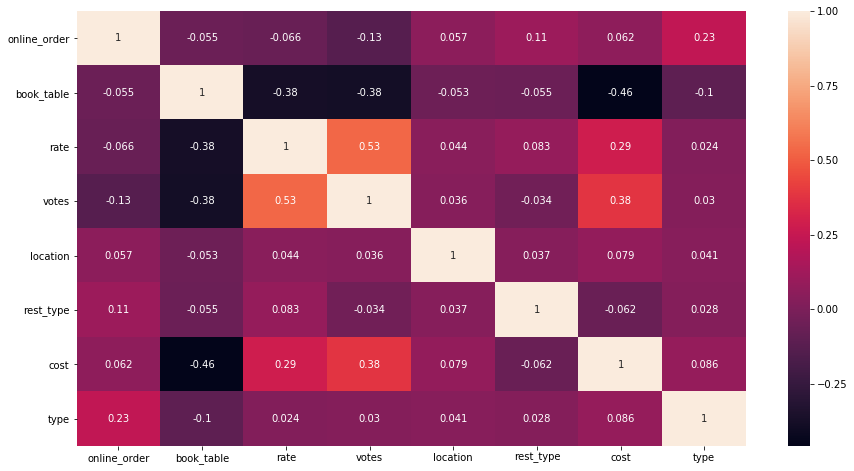

In [17]:
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
#plt.savefig("correlation.png")
zomato_en.columns

# Regression Analysis

In [18]:
#Defining the independent variables and dependent variables
x=zomato_en.loc[:,['online_order', 'book_table', 'type','location','cost','votes']]
y=zomato_en.loc[:,['rate']]

In [19]:
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1)

### Linear Regression

In [20]:
#Linear Regression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error
print('R-squared score of the Linear model: ', r2_score(y_test, y_pred))
print('MSE of the Linear model: ', mean_squared_error(y_test, y_pred))

R-squared score of the Linear model:  0.28869530947077515
MSE of the Linear model:  0.13831660004362445


### Descision Tree

In [21]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
print('R-squared score of the Decision Tree model: ', r2_score(y_test, y_predict))
print('MSE of the Decision Tree model: ', mean_squared_error(y_test, y_predict))

R-squared score of the Decision Tree model:  0.7832210503007714
MSE of the Decision Tree model:  0.04280162430986593


### Random Forest

In [22]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
print('R-squared score of the Random Forest model: ', r2_score(y_test, y_predict))
print('MSE of the Random Forest model: ', mean_squared_error(y_test, y_predict))

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R-squared score of the Random Forest model:  0.8061121020287574
MSE of the Random Forest model:  0.03828193179600166


### DjanjoFunction

In [23]:
def convert(data):
    lst=[]
 #Online_Order
    if data[0][0] is 'Yes':
        lst.append(1)
    else:
        lst.append(0)
 #Book_Table       
    if data[1][0] is 'Yes':
        lst.append(1)
    else:
        lst.append(0)
  #Type      
    if data[2][0] == 'Buffet':
        lst.append(0)
    elif data[2][0] == 'Cafes':
        lst.append(1)
    elif data[2][0] == 'Delivery':
        lst.append(2)
    elif data[2][0] == 'Desserts':
        lst.append(3)
    elif data[2][0] == 'Dine-out':
        lst.append(4)
    elif data[2][0] == 'Drinks & nightlife':
        lst.append(5)
    else:
        lst.append(6)   
        
    #City    
    if data[3][0] == 'Banashankari':
        lst.append(0)
    elif data[3][0] == 'Bannerghatta Road':
        lst.append(1)   
    elif data[3][0] == 'Basavanagudi':
        lst.append(2)
    elif data[3][0] == 'Bellandur':
        lst.append(3)
    elif data[3][0] == 'Brigade Road':
        lst.append(4)
    elif data[3][0] == 'Brookefield':
        lst.append(5)
    elif data[3][0] == 'BTM':
        lst.append(6)
    elif data[3][0] == 'Church Street':
        lst.append(7)
    elif data[3][0] == 'Electronic City':
        lst.append(8)
    elif data[3][0] == 'Frazer Town':
        lst.append(9)
    elif data[3][0] == 'HSR':
        lst.append(10)
    elif data[3][0] == 'Indiranagar':
        lst.append(11)
    elif data[3][0] == 'Jayanagar':
        lst.append(12)
    elif data[3][0] == 'JP Nagar':
        lst.append(13)
    elif data[3][0] == 'Kalyan Nagar':
        lst.append(14)
    elif data[3][0] == 'Kammanahalli':
        lst.append(15)
    elif data[3][0] == 'Koramangala 4th Block':
        lst.append(16)
    elif data[3][0] == 'Koramangala 5th Block':
        lst.append(17)
    elif data[3][0] == 'Koramangala 6th Block':
        lst.append(18)
    elif data[3][0] == 'Koramangala 7th Block':
        lst.append(19)
    elif data[3][0] == 'Lavelle Road':
        lst.append(20)
    elif data[3][0] == 'Malleshwaram':
        lst.append(21)
    elif data[3][0] == 'Marathahalli':
        lst.append(22)
    elif data[3][0] == 'MG Road':
        lst.append(23)
    elif data[3][0] == 'New BEL Road':
        lst.append(24)
    elif data[3][0] == 'Old Airport Road':
        lst.append(25)
    elif data[3][0] == 'Rajajinagar':
        lst.append(26)
    elif data[3][0] == 'Residency Road':
        lst.append(27)
    elif data[3][0] == 'Sarjapur Road':
        lst.append(28)
    else:
        lst.append(29)
    
    
    lst.append(data[4][0])
    lst.append(data[5][0])

    a=round(RForest.predict(pd.DataFrame(lst).transpose())[0],1)  
    return(a)

In [30]:
input_data=pd.DataFrame(['No','No','Coffee','Rajajinagar',600.0,200]).transpose()

In [31]:
convert(input_data)

3.8

### XGBoost

In [32]:
import xgboost as xgb

In [33]:
X=zomato_en.loc[:,['online_order', 'book_table', 'type','location','cost','votes']]
y=zomato_en.loc[:,['rate']]

In [34]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [35]:
data_dmatrix

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [37]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.4,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [38]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [39]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
print('R-squared score of the XG Boost: ', r2_score(y_test, preds))

RMSE: 0.286979
R-squared score of the XG Boost:  0.5784869370378085


### k-fold Cross Validation using XGBoost

In [40]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.4,
                'max_depth': 5, 'lambda': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,
                    metrics="rmse", as_pandas=True, seed=123)

In [41]:
cv_results.head(5)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.971280,0.001310,1.971071,0.003945
1,1.227658,0.008963,1.226946,0.008916
2,0.798510,0.014653,0.797430,0.009687
3,0.571076,0.022292,0.569973,0.017319
4,0.443265,0.006126,0.443237,0.001771


# Clustering

### Check Clustering Tendency

### Data Scaling

In [42]:
from pyclustertend import hopkins
from pyclustertend import vat

In [43]:
cluster_data = scale(x)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


### Hopkins Test

In [44]:
hopkins(cluster_data,20000)

0.004075459427038012

Since the hopkins value is <.50 so it suggests that data is clusterable.

### VAT Test

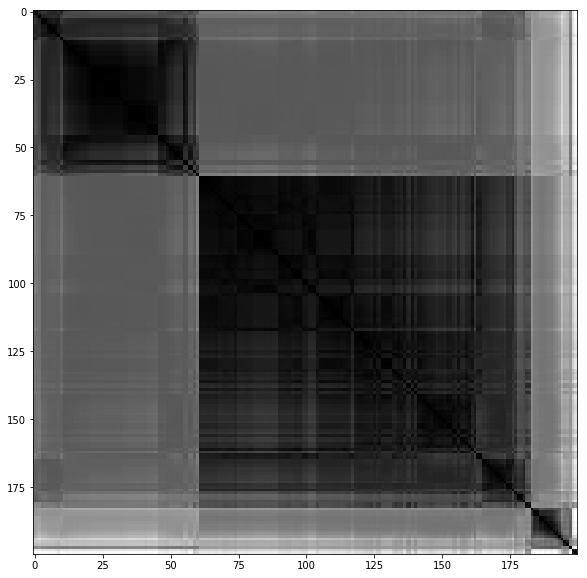

In [45]:
vat(cluster_data[0:200])

VAT Test ouptu suggest that there are 4 clusters

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_score_max = -1 #this is the minimum possible score

for n_clusters in range(2,10):
  model = KMeans(n_clusters = n_clusters, init='k-means++', max_iter=100, n_init=1)
  labels = model.fit_predict(cluster_data)
  sil_score = silhouette_score(cluster_data, labels)
  print("The average silhouette score for %i clusters is %0.2f" %(n_clusters,sil_score))
  if sil_score > sil_score_max:
    sil_score_max = sil_score
    best_n_clusters = n_clusters

The average silhouette score for 2 clusters is 0.28
The average silhouette score for 3 clusters is 0.43
The average silhouette score for 4 clusters is 0.30
The average silhouette score for 5 clusters is 0.34
The average silhouette score for 6 clusters is 0.31
The average silhouette score for 7 clusters is 0.34
The average silhouette score for 8 clusters is 0.35
The average silhouette score for 9 clusters is 0.35


In [47]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_data)
    Sum_of_squared_distances.append(km.inertia_)

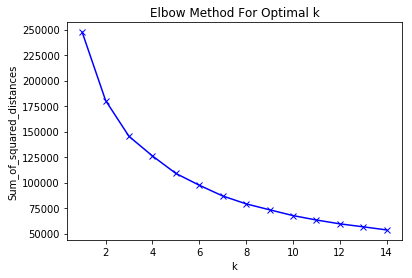

In [48]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### K Means

In [49]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters=4).fit(cluster_data)

In [51]:
kmeans.labels_.astype(float)

array([2., 3., 3., ..., 0., 2., 0.])

In [52]:
cluster_data=pd.DataFrame(cluster_data)

Text(0, 0.5, 'Votes')

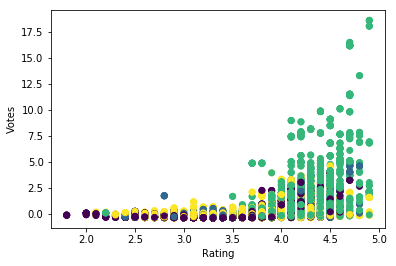

In [55]:
plt.scatter(zomato_en['rate'],cluster_data.iloc[:,[5]], c= kmeans.labels_.astype(float), alpha=1)
plt.xlabel('Rating')
plt.ylabel('Votes')

Text(0, 0.5, 'Cost')

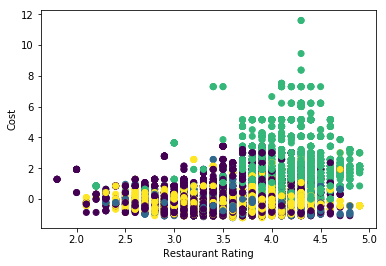

In [56]:
plt.scatter(zomato_en['rate'],cluster_data.iloc[:,[4]], c= kmeans.labels_.astype(float), alpha=1)
plt.xlabel('Restaurant Rating')
plt.ylabel('Cost')

# Text Mining

Visualize Rate Class Distribution

In [57]:
# Creating a new dataset that has only customer reviews and restaurant ratings
review_data=df[df['rate'] > 4][['reviews_list','rate']]

In [58]:
#For 2 star rating
review_data_2star=df[df['rate'] < 2.5][['reviews_list','rate']]

In [59]:
import nltk
from nltk.corpus import RegexpTokenizer as regextoken
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams, trigrams

In [60]:
# Converting all the text to lowercase
review_data_2star["reviews_list"] = review_data_2star["reviews_list"].apply(lambda x: x.lower())

# Creating a regular expression tokenizer that matches only alphabets
# This will return separate words (tokens) from the text
tokenizer = regextoken("[a-zA-Z]+") 
# Applying the tokenizer to each row of the reviews
review_tokens = review_data_2star["reviews_list"].apply(tokenizer.tokenize)
# Examining the tokens created for the first row / restaurant
#print(review_tokens[0])

In [61]:
# Importing the English stopwords directory 
stop = stopwords.words("english")

In [62]:
# Adding custom words to stopwords 
stop.extend(["rated", "n", "nan", "x","place","ordered","service","one","try","also","food","good"])
# Removing stopwords from the tokens
review_tokens = review_tokens.apply(lambda x: [token for token in x if token not in stop])
# Concatenating all the reviews 
all_reviews = review_tokens.astype(str).str.cat()
cleaned_reviews = tokenizer.tokenize(all_reviews)

In [63]:
# Getting the frequency distribution of individual words in the reviews
fd = FreqDist()
for word in cleaned_reviews:
    fd[word] += 1
    
# Examining the top 5 most frequent words
fd.most_common(200)

[('order', 5609),
 ('delivery', 4580),
 ('chicken', 4094),
 ('time', 3431),
 ('taste', 2895),
 ('bad', 2861),
 ('biryani', 2735),
 ('restaurant', 2560),
 ('like', 2514),
 ('never', 2320),
 ('even', 2296),
 ('worst', 2210),
 ('get', 2073),
 ('really', 2060),
 ('quality', 1975),
 ('would', 1954),
 ('go', 1874),
 ('experience', 1812),
 ('delivered', 1803),
 ('night', 1650),
 ('ever', 1636),
 ('got', 1628),
 ('pathetic', 1563),
 ('enough', 1514),
 ('alibi', 1498),
 ('much', 1341),
 ('please', 1339),
 ('money', 1333),
 ('ni', 1315),
 ('quantity', 1312),
 ('people', 1312),
 ('late', 1290),
 ('staff', 1261),
 ('home', 1258),
 ('great', 1224),
 ('well', 1222),
 ('paneer', 1206),
 ('guys', 1201),
 ('veg', 1182),
 ('average', 1173),
 ('deliver', 1155),
 ('better', 1134),
 ('rice', 1101),
 ('us', 1078),
 ('mast', 1076),
 ('want', 1075),
 ('kalandar', 1056),
 ('hours', 1056),
 ('biriyani', 1044),
 ('hour', 1040),
 ('decent', 1018),
 ('indian', 998),
 ('horrible', 996),
 ('nthe', 990),
 ('worth', 9

In [64]:
lst2 = [item[0] for item in fd.most_common(200)]

In [65]:
from wordcloud import WordCloud 

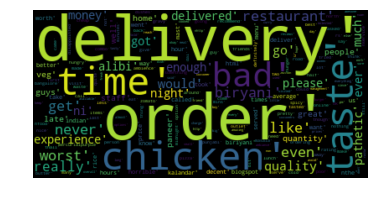

In [66]:
# Start with one review:
text = str(lst2)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
# Save the image in the img folder:
#wordcloud.to_file("C:/Users/Owner/Downloads/College/Capstone Project/first_review.png")

In [68]:
text = " ".join(review for review in review_data_2star["reviews_list"])

### Find Adjectives

In [70]:
pos_sentences=[nltk.pos_tag(sent) for sent in [lst2]]

In [71]:
#JJ, NN

adjectives_first200_reviews=[a[0] for a in pos_sentences[0] if a[1]=='NN']
adjectives_first200_reviews[1]

'delivery'

In [72]:
from PIL import *

In [73]:
#wine_mask = np.array(Image.open("C:/Users/Owner/Downloads/College/Capstone Project/wine_mask.png"))
dislike_mask = np.array(Image.open("C:/Users/Owner/Downloads/College/Capstone Project/dislike.png"))
dislike_mask

array([[[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       ...,

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]],

       [[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]]], dtype=uint8)

In [74]:
#transform_format() function to swap number 0 to 255.
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val


In [75]:
#transform_format() function to swap number 0 to 255 for any image
def transform_any_image_format(val):
    if val.any() == 0:
        return 255
    elif val.any() == 1 :
        return 1
    elif val.any()!=0:
        return 255
    else:
        return val

In [77]:
# Transform your mask into a new one that will work with the function:
transformed_dislike_mask = np.ndarray((dislike_mask.shape[0],dislike_mask.shape[1]), np.int32)

for i in range(len(dislike_mask)):
    transformed_dislike_mask[i] = list(map(transform_any_image_format, dislike_mask[i]))

In [78]:
# Check the expected result of your mask
transformed_dislike_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

In [79]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_dislike_mask, contour_width=3, contour_color='firebrick').generate(str(adjectives_first200_reviews))

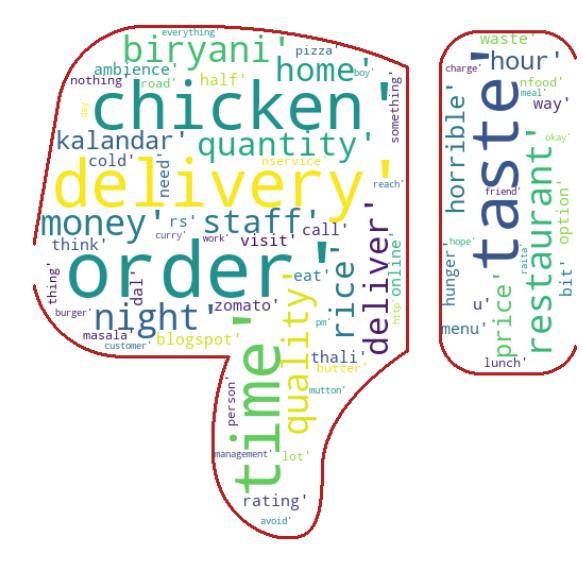

In [80]:
# store to file
wc.to_file("C:\\Users\\Owner\\Downloads\\College\\Capstone Project\\dislike_adjective.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Visualizing Data

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

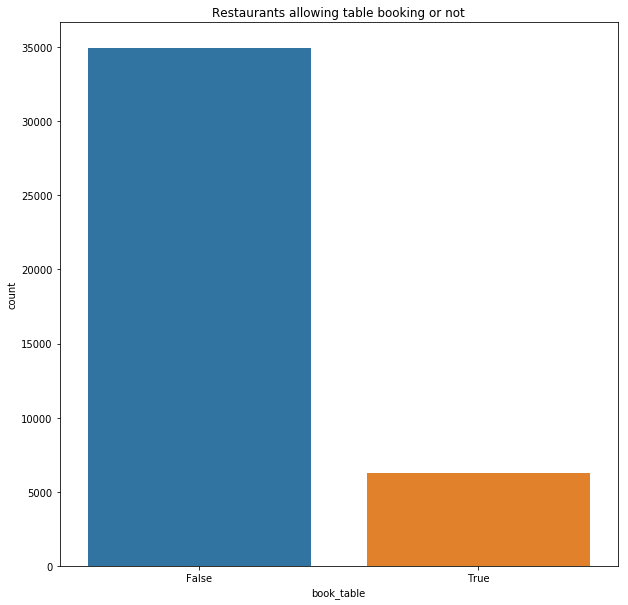

In [163]:
sns.countplot(df['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig("Book_Table.png")
plt.title('Restaurants allowing table booking or not')

Text(0.5, 1.0, 'Location')

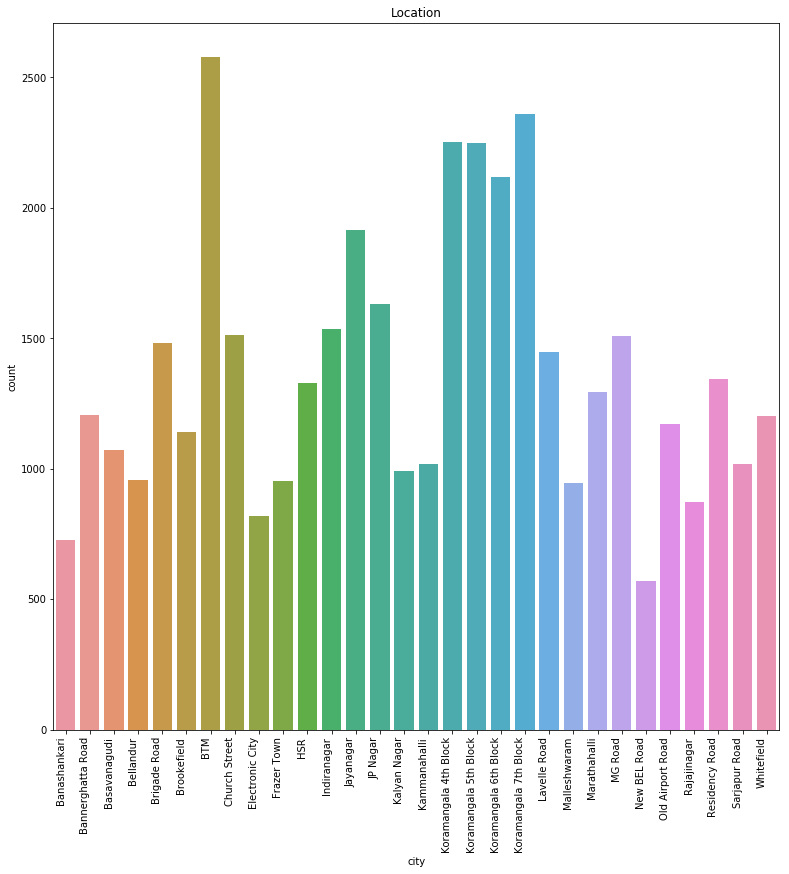

In [164]:
sns.countplot(df['city'])
sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
#plt.savefig("Location.png")
plt.title('Location')

In [165]:
def plot_distribution_overlay(df, attribute):
    sns.distplot(df[df['online_order']==0][attribute].values, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = 'Online')
    sns.distplot(df[df['online_order']==1][attribute].values, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = 'Offline')
    
    plt.title('online_order vs. {} '.format(attribute), fontsize=25)
    plt.xlabel(attribute, fontsize=20)
    plt.show()

C:\Users\Owner\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


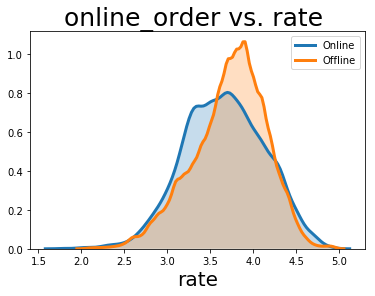

In [166]:
plot_distribution_overlay(df, 'rate')

Restaurants which provide online order facility seem to have better rating than the restaurants which don't.

### Online Order vs Rating

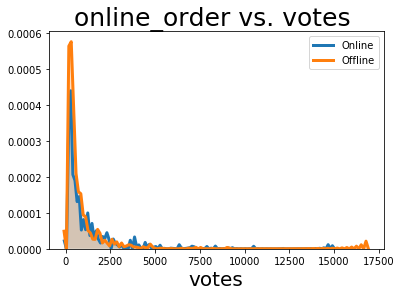

In [167]:
plot_distribution_overlay(df, 'votes')

### Type of Service

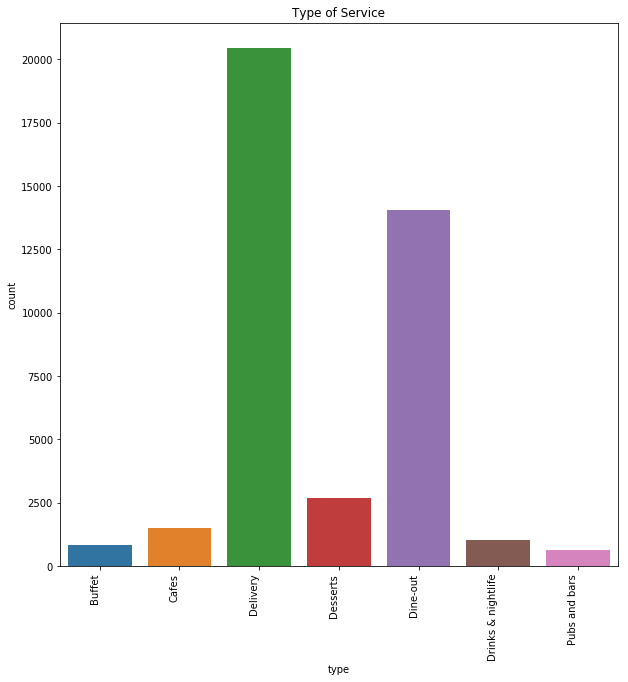

In [169]:
sns.countplot(df['type'])
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type of Service')
plt.savefig('Types of Service')

### No. of restaurants in a Location

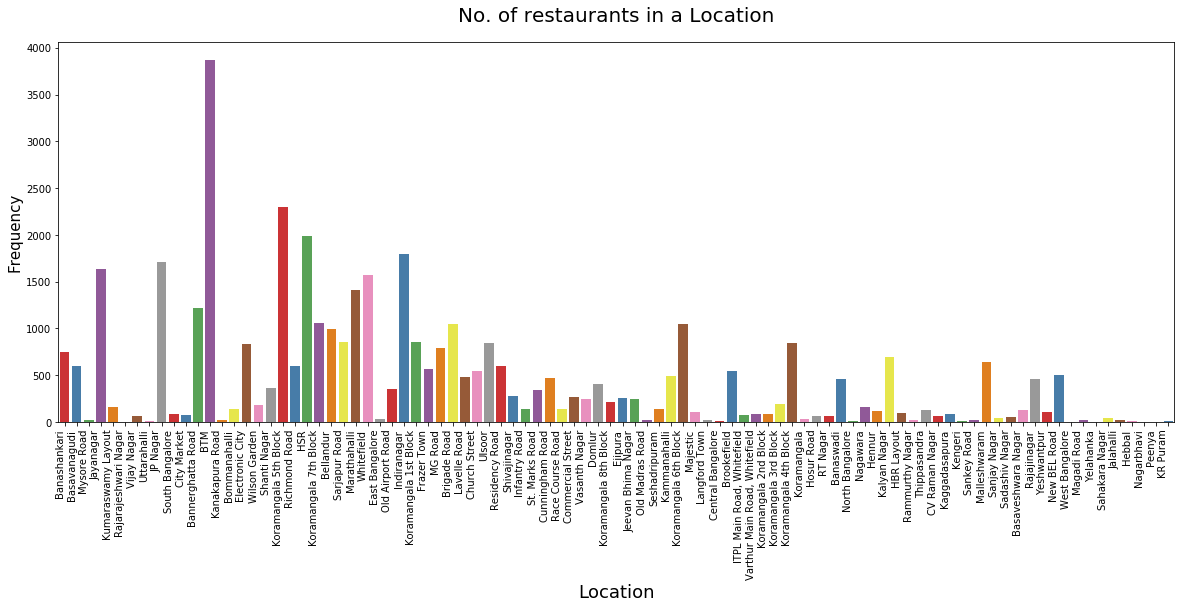

In [170]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('No. of restaurants in a Location',size = 20,pad=20)
plt.savefig("Restaurants in Location")

### Online Order %

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from skimage import io

In [172]:
def plot_filled_text(text='Untitled', percentage=0.5, color='denim blue', ax=None):
    
    fig, ax1 = plt.subplots(figsize=(13, 2));
    ax1.text(0, 0, text, fontsize=144, fontweight='bold', color=sns.xkcd_rgb['light grey']);
    ax1.axis('off');

    ax1.xaxis.set_major_locator(plt.NullLocator());
    ax1.yaxis.set_major_locator(plt.NullLocator());
    fig.savefig(fname='temp.png', dpi=300, bbox_inches='tight', pad_inches=0);

    plt.close()


    img = io.imread('temp.png')
    height, width, _ = img.shape

    output = np.copy(img)

    light_grey = sns.xkcd_palette(['light grey'])[0]
    light_grey = [int(x*255) for x in light_grey] + [255]
    light_grey

    mask = (img == light_grey).all(-1)

    start = np.where(mask.any(1) == True)[0][0]
    end = np.where(mask.any(1) == True)[0][-1]
    font_height = end - start

    mask2 = np.zeros((height, width), dtype=bool)
    mask2[(font_height - int(percentage*font_height)):end, ] = True

    mask3 = mask & mask2
    
    mask_color = sns.light_palette(sns.xkcd_palette([color])[0], 20)[int(15*percentage)+4]
    mask_color = [int(x*255) for x in mask_color]
    output[mask3] = mask_color

    if ax is None:
        fig, ax = plt.subplots(figsize=(20, 10))
    ax.imshow(output)
    ax.axis('off');

In [173]:
text='Online Order:',round((df.online_order.value_counts(normalize=True)*100)[1],2)

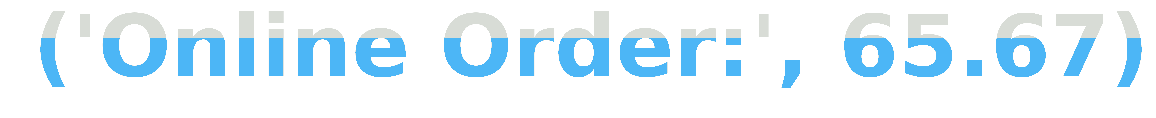

In [174]:
plot_filled_text(text, percentage=(df.online_order.value_counts(normalize=True))[1], color='azure')

# Django

## Demographic 

### About Restaurants 

In [164]:
def news(request):
    df_cleaned=pd.read_csv('C:\\Users\\Owner\\Downloads\\College\\Capstone Project\\cleaned_restaurants.csv')
    total_restaurants=df.shape[0]
    best_location=df.location.value_counts().idxmax()
    best_cuisine=df.cuisines.value_counts().idxmax()
    top_rating=df.rate.value_counts().idxmax()
    return render(request,'news.html',{'total_restaurants': total_restaurants,'best_location':best_location
    ,'best_cuisine':best_cuisine,'top_rating':top_rating})

In [36]:
df_cleaned=pd.read_csv('C:\\Users\\Owner\\Downloads\\College\\Capstone Project\\cleaned_restaurants.csv')

In [48]:
top_rating=max(list(df.rate.unique()))
top_rating

4.9

### Wordcloud

In [ ]:
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams, trigrams
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

stopwords = set(STOPWORDS)
stopwords.update(["Cafe", "Tea"])

In [ ]:
text = " ".join(dish for dish in df_cleaned.cuisines)

In [34]:
wordcloud = WordCloud(
                      font_path='C:\\Users\\Owner\\Downloads\\College\\Capstone Project\\cabinsketch\\CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=6000,
                      height=3400
                     ).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('C:\\Users\\Owner\\Downloads\\College\\Capstone Project\\best_food.png', dpi=1000)
plt.show()

### Find Latitude Longitude

In [149]:
df.groupby(['city']).count().sort_values('name', ascending=False).head(10)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type
city,,,,,,,,,,,,
BTM,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580
Koramangala 7th Block,2360,2360,2360,2360,2360,2360,2360,2360,2360,2360,2360,2360
Koramangala 4th Block,2254,2254,2254,2254,2254,2254,2254,2254,2254,2254,2254,2254
Koramangala 5th Block,2249,2249,2249,2249,2249,2249,2249,2249,2249,2249,2249,2249
Koramangala 6th Block,2120,2120,2120,2120,2120,2120,2120,2120,2120,2120,2120,2120
Jayanagar,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915,1915
JP Nagar,1632,1632,1632,1632,1632,1632,1632,1632,1632,1632,1632,1632
Indiranagar,1537,1537,1537,1537,1537,1537,1537,1537,1537,1537,1537,1537
Church Street,1512,1512,1512,1512,1512,1512,1512,1512,1512,1512,1512,1512


In [157]:
top5_location=pd.DataFrame({'location':['BTM','Koramangala 5th Block','Koramangala 4th Block','Koramangala 6th Block','JP Nagar']})

In [158]:
from opencage.geocoder import OpenCageGeocode

In [159]:
key = 'fc22160bcf0b4bc2a919971ee205c2c3'  # get api key from:  https://opencagedata.com
geocoder = OpenCageGeocode(key)

In [160]:
list_lat = []   # create empty lists
list_long = []

for index, row in top5_location.iterrows(): # iterate over rows in dataframe

    city = row['location']       
    query = str(city)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)
# create new columns from lists    

top5_location['lat'] = list_lat   
top5_location['lon'] = list_long

In [161]:
top5_location.head(5)

,location,lat,lon
0,BTM,12.911276,77.604565
1,Koramangala 5th Block,13.292399,77.751926
2,Koramangala 4th Block,12.934334,77.630406
3,Koramangala 6th Block,13.292399,77.751926
4,JP Nagar,12.265594,76.646540


In [162]:
print('Latitude Max=',top5_location.lat.max(),'Latitude Min=',top5_location.lat.min(),'Longitutde Max=',top5_location.lon.max(),'Longitude Min=',top5_location.lon.min())


Latitude Max= 13.2923988 Latitude Min= 12.2655944 Longitutde Max= 77.7519261 Longitude Min= 76.6465404


### Bar Chart

In [145]:
df_cleaned["grouped_rating"] = pd.cut(df_cleaned["rate"], bins = [0, 2.0, 3.0, 4.0, 5.0], labels = ["1", "2", "3", "4"])

In [146]:
a=pd.DataFrame(df_cleaned.groupby(['online_order','grouped_rating'])['name'].count().replace(np.nan,0))

In [147]:
lst_rating=[{'Online_Order': 0,  'Rating_1': a['name'][0][0], 'Rating_2': a['name'][0][1],'Rating_3': a['name'][0][2],'Rating_4': a['name'][0][3]},
 {'Online_Order': 1, 'Rating_1': 0, 'Rating_2': a['name'][1][1],'Rating_3': a['name'][1][2],'Rating_4': a['name'][1][3]},
]


order_lst = list()
rating1_lst = list()
rating2_lst = list()
rating3_lst = list()
rating4_lst = list()

for i in lst_rating:
    order_lst.append(i['Online_Order'])
    rating1_lst.append(i['Rating_1'])
    rating2_lst.append(i['Rating_2'])
    rating3_lst.append(i['Rating_3'])
    rating4_lst.append(i['Rating_4'])
    
    #return render(request, 'news.html', {'online_order': json.dumps(order_lst),'rating1': json.dumps(rating1_lst),'rating2': json.dumps(rating2_lst),'rating3': json.dumps(rating3_lst),'rating4': json.dumps(rating4_lst)})

In [148]:
rating1_lst

[16, 0]

### Split Packed Bubble Chart

In [4]:
a_online=df_cleaned[df_cleaned['online_order']==True]
grouped = a_online.groupby('rest_type')['name'].count().reset_index()
x=grouped.sort_values('name', ascending=False).head(10).reset_index()

In [5]:
a_offline=df_cleaned[df_cleaned['online_order']==False]
grouped = a_offline.groupby('rest_type')['name'].count().reset_index()
y=grouped.sort_values('name', ascending=False).head(10).reset_index()


In [18]:
lst_online_order_res=[{'"'+str(x['rest_type'][i])+'"' : x['name'][i]} for i in range(len(x))]
lst_offline_order_res=[{'"'+str(y['rest_type'][i])+'"' : y['name'][i]} for i in range(len(y))]